# Práctica 6

In [25]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

## 1. Support Vector Machines

### 1.1 Kernel lineal

In [26]:
mat = loadmat('ex6data1.mat')
X = mat.get("X")
y = mat.get("y")

In [27]:
print(X.shape)
print(y.shape)

(51, 2)
(51, 1)


In [52]:
def plot_data(X, y):
    pos = (y == 1).ravel()
    neg = (y == 0).ravel()
    
    plt.figure()
    plt.scatter(X[pos,0], X[pos,1], color='black', marker='+', label = 'y = 1')
    plt.scatter(X[neg,0], X[neg,1], color='yellow', marker='o', label = 'y = 0')
    plt.legend(loc = 'best', bbox_to_anchor=(1,1))

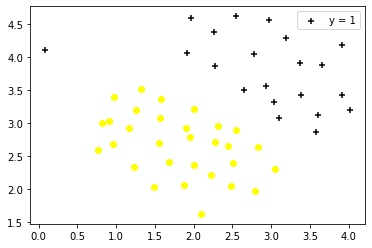

In [43]:
plot_data(X, y)

In [44]:
def visualize_boundary(X, y, svm):
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()

    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max),
    np.linspace(x2_min, x2_max))
    
    #x1 = np.linspace(X[:, 0].min(). X[:, 0].max(), 100)
    #x1 = np.linspace(X[:, 1].min(). X[:, 1].max(), 100)
    #x1, x2 =np.meshgrid(x1, x2)
    
    yp = svm.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    
    plot_data(X, y)
    plt.contour(xx1, xx2, yp)
    plt.close

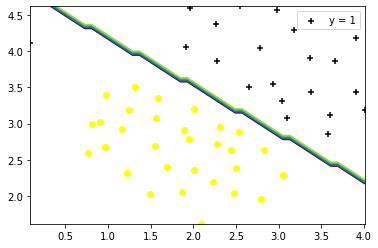

In [45]:
svm = SVC(kernel='linear', C=1.0)
svm.fit(X,y.ravel())
visualize_boundary(X, y, svm)

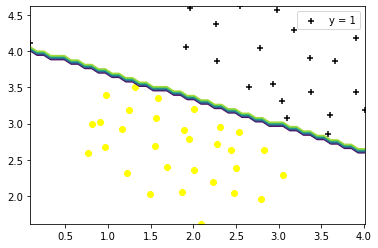

In [46]:
svm = SVC(kernel='linear', C=100.0)
svm.fit(X,y.ravel())
visualize_boundary(X, y, svm)

### 1.2 Kernel Gaussiano

In [49]:
mat = loadmat('ex6data2.mat')
X = mat.get("X")
y = mat.get("y")

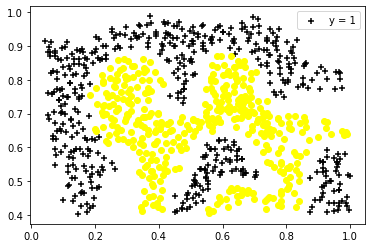

In [50]:
plot_data(X, y)

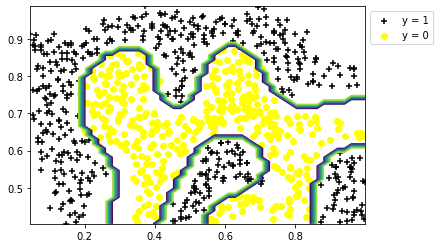

In [55]:
sigma=0.1
svm = SVC(kernel='rbf', C=1.0, gamma = 1/(2*sigma**2))
svm.fit(X,y.ravel())
visualize_boundary(X, y, svm)

### 1.3 Elección de los parámetros C y sigma

In [59]:
mat = loadmat('ex6data3.mat')
X = mat.get("X")
y = mat.get("y")
Xval = mat.get("Xval")
Yval = mat.get("Yval")

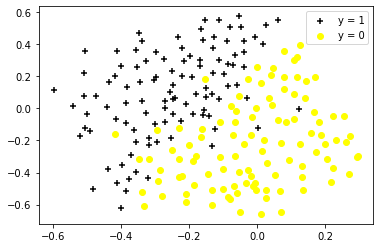

In [60]:
plot_data(X, y)

In [ ]:
C_vec = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
sigma_vec = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
scores = np.zeros((len(C_vec), len(sigma_vec)))